<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.layers import MaxPool2D

Using TensorFlow backend.


In [3]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [4]:
# insert code here
#data=cifar10.load_data()
(X_train, t_train), (X_test, t_test) = cifar10.load_data()

In [5]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [6]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [7]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

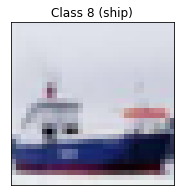

In [8]:
check_one(X_train, t_train.flatten())

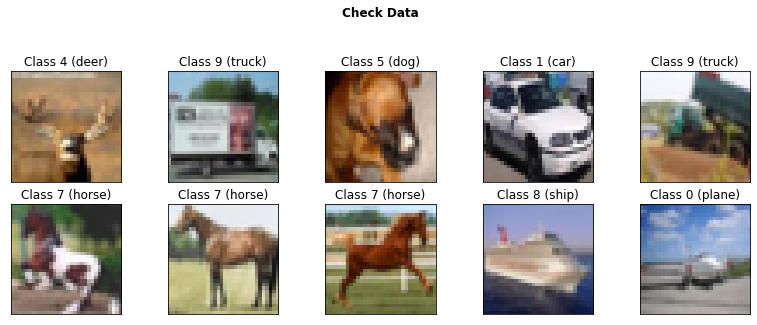

In [9]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [10]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likelly to require mo re complex models.

In [13]:
model = Sequential()

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
#model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
#model.add(MaxPool2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [32]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 96)        27744     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 96)        83040     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 96)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3456)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

## Compile the model

In [33]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [34]:
tensorboard = TensorBoard(log_dir = 'logs')

In [35]:
%%time
# insert code here

# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 3,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print()

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 550s 14ms/step - loss: 2.3217 - accuracy: 0.3769 - val_loss: 1.5288 - val_accuracy: 0.4466
Epoch 2/3
40000/40000 [==============================] - 515s 13ms/step - loss: 1.3965 - accuracy: 0.4993 - val_loss: 1.3535 - val_accuracy: 0.5215
Epoch 3/3
40000/40000 [==============================] - 523s 13ms/step - loss: 1.2468 - accuracy: 0.5581 - val_loss: 1.2439 - val_accuracy: 0.5601

Wall time: 26min 31s


### TensorBoard
- If **TensorBoard** is configured correctly in _all_ steps above then run the command below from a separate **Terminal (maxOS)** or **Command Window (Windows)**.

        tensorboard --logdir=logs

- Point the browser to the following URL

        http://localhost:6006

- Select **SCALARS** and click the Recycle icon

![image.png](attachment:image.png)

## Create predictions

In [36]:
%%time
predictions = model.predict_classes(X_test)

Wall time: 39.6 s


## Evaluate the model

In [37]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

10000/10000 [==============================] - 48s 5ms/step

Test loss: 1.234069, Test accuracy: 0.564200


In [38]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [39]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 715  66  38  15   9   2  13  16  93  33 
  1|  48 833   5   5   2   2   7  10  28  60 
  2| 121  27 442  90 100  48  55  60  31  26 
  3|  48  32 125 400  78 107  88  73  19  30 
  4|  69  12 170  72 401  27  76 141  19  13 
  5|  30  18 154 231  57 321  37 121  19  12 
  6|  12  28  65  81  80  17 656  19  18  24 
  7|  41  11  48  62  55  36  13 697  10  27 
  8| 154  86  14  12   6   1   5   7 686  29 
  9|  70 305   8  14   4   4  12  25  67 491 


In [40]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

## Visualisation of cost

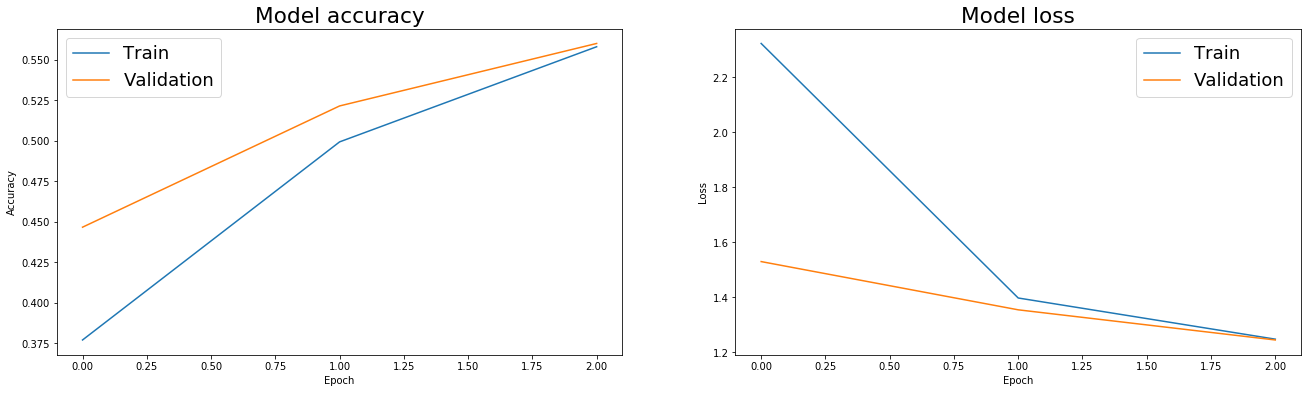

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'])
ax[0].plot(model.history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

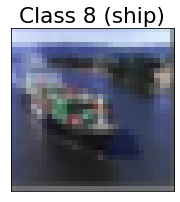

In [42]:
check_one(X_test, predictions, actual = y_test, compare = True)# insert code here

>

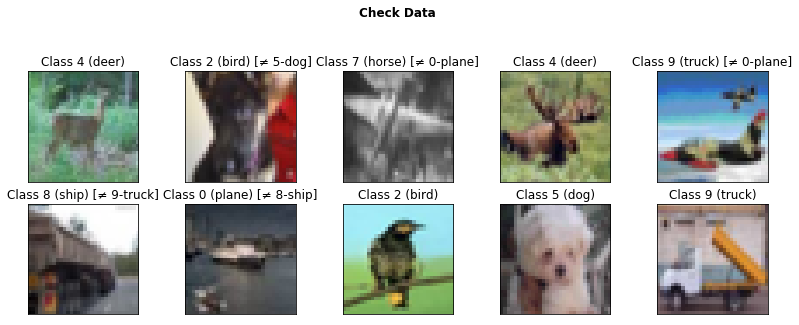

In [43]:
check_ten(X_test, predictions, y_test, True)

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



